# Setup

In [1]:
import glob
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from random import randint
import cv2

# Create Black and Draw White

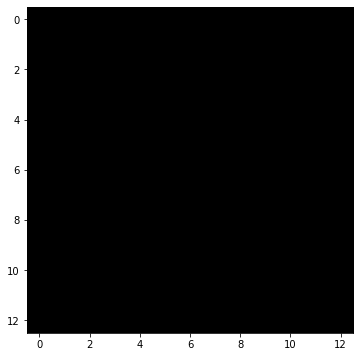

In [2]:
black_img = np.zeros((13, 13))
plt.figure(figsize = (10, 6))
plt.imshow(black_img, cmap="gray")
plt.show()

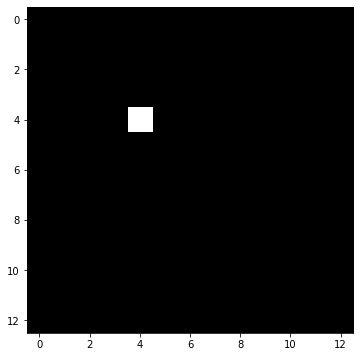

In [8]:
dummy = black_img.copy()
dummy[4,4] = 1
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

Area: 9.0


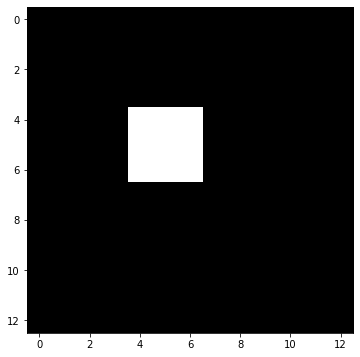

In [12]:
starting = [4, 4]
filter_size = 3

dummy = black_img.copy()

for i in range(filter_size):
    for j in range(filter_size):
        dummy[starting[0]+i, starting[1]+j] = 1
        
print("Area:", np.sum(dummy))        
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

In [15]:
def fixel_to_filter(img, center_point = [5, 5], filter_size = 3):
    starting = [center_point[0] - 0.5*(filter_size-1), center_point[1] - 0.5*(filter_size-1)]
    
    dummy = img.copy()

    for i in range(filter_size):
        for j in range(filter_size):
            dummy[int(starting[0])+i, int(starting[1])+j] = 1
    return dummy

Area: 49.0


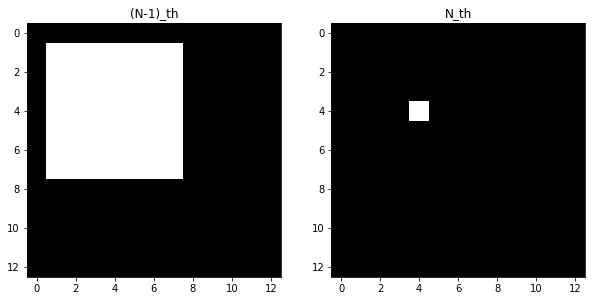

In [23]:
center_point = [4, 4]
filter_size = 7

img = black_img.copy()

fea_map = img.copy()
fea_map[center_point[0], center_point[1]] = 1
output = fixel_to_filter(img, center_point, filter_size)
        
print("Area:", np.sum(output))        
plt.figure(figsize = (10, 6))
plt.subplot(121), plt.imshow(output, cmap="gray"), plt.title("(N-1)_th")
plt.subplot(122), plt.imshow(fea_map, cmap = "gray"), plt.title("N_th")
plt.show()

Area: 50.0


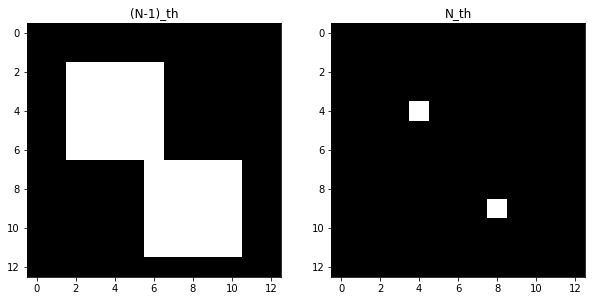

In [26]:
center_points = [[4, 4], [9, 8]]
filter_size = 5

img = black_img.copy()
fea_map = img.copy()
output = img.copy()

for center_point in center_points:
    fea_map[center_point[0], center_point[1]] = 1
    output = fixel_to_filter(output, center_point, filter_size)
        
print("Area:", np.sum(output))        
plt.figure(figsize = (10, 6))
plt.subplot(121), plt.imshow(output, cmap="gray"), plt.title("(N-1)_th")
plt.subplot(122), plt.imshow(fea_map, cmap = "gray"), plt.title("N_th")
plt.show()

In [27]:
def get_center_list(img):
#     center_list = np.argwhere(img > 0)
    return np.argwhere(img > 0)

In [28]:
center_list = get_center_list(fea_map)
print(center_list)

[[4 4]
 [9 8]]


# How 1 Pixel in N_th Feature Map Represents Input (Stride = 1)

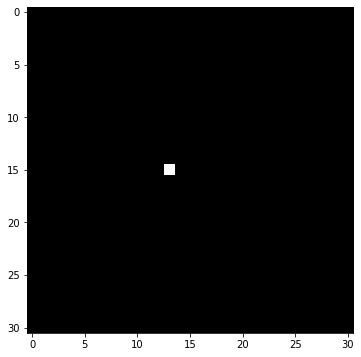

In [54]:
black_img = np.zeros((31, 31))
dummy = black_img.copy()
dummy[15, 13] = 1
plt.figure(figsize = (10, 6))
plt.imshow(dummy, cmap="gray")
plt.show()

Area in Layer 2: 9.0


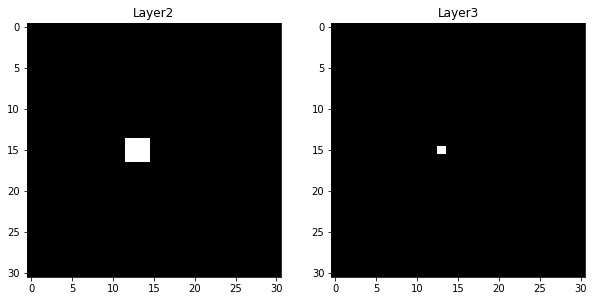

Area in Layer 1: 49.0


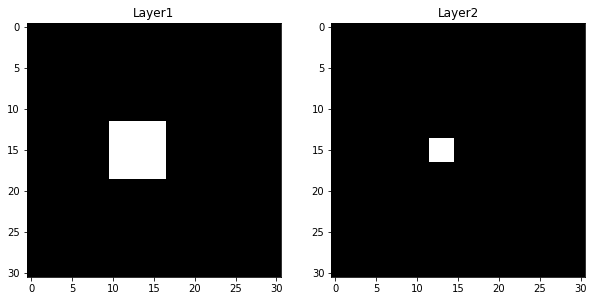

Area in Layer 0: 121.0


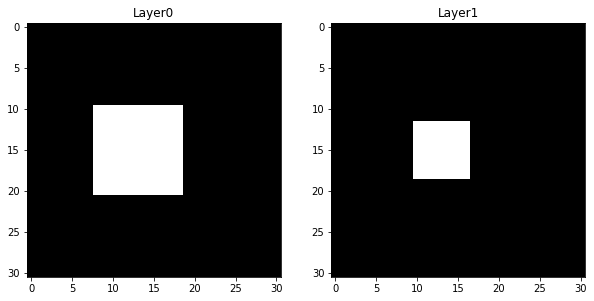

In [63]:
network = [5, 5, 3]

reversed_net = network[::-1]
layers = reversed_net
fea_map = dummy.copy()
temp = fea_map

for i in range(len(layers)):
    current_feature = temp
    center_points = get_center_list(temp)

    represented = black_img.copy()

    for center_point in center_points:
        represented = fixel_to_filter(represented, center_point, filter_size = layers[i])
   
    temp = represented

    print(f"Area in Layer {len(layers)-i-1}:", np.sum(represented))
    plt.figure(figsize = (10, 6))
    plt.subplot(121), plt.imshow(represented, cmap="gray"), plt.title(f"Layer{len(layers)-i-1}")
    plt.subplot(122), plt.imshow(current_feature, cmap = "gray"), plt.title(f"Layer{len(layers)-i}")
    plt.show()